In [1]:
# The MIT License (MIT) Copyright (c) 2023 Emilio Morales
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of 
# this software and associated documentation files (the "Software"), to deal in the Software without 
# restriction, including without limitation the rights to use, copy, modify, merge, publish, 
# distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the 
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or 
# substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
# INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND 
# NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES 
# OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN 
# CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/milmor/NLP/blob/main/Notebooks/10.2_Optimizers.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
</table>

# Optimizadores

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
learning_rate = 0.1  # Tasa de aprendizaje
num_iterations = 100  # Número de iteraciones
initial_max = 0.7    # Valor inicial máximo

# Definimos la función f(x)
def f(x):
    return np.sin(x) + np.sin(2*x) + np.sin(3*x)

# Derivada de la función f(x)
def df(x):
    return np.cos(x) + 2*np.cos(2*x) + 3*np.cos(3*x)

def plot_history(f, x_history, label):
    # Creamos un arreglo de valores x para graficar f(x)
    x_values = np.linspace(0, 10, 1000)
    y_values = f(x_values)
    
    # Graficamos la función f(x)
    plt.figure(figsize=(12, 6))
    plt.plot(x_values, y_values, label='f(x) = sin(x) + sin(2x) + sin(3x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gráfico de f(x) y Trayectoria')
    plt.grid(True)
    
    # Graficamos la trayectoria de Adam
    plt.scatter(x_history, [f(x) for x in x_history], color='red', marker='o', label=label)
    plt.legend()
    plt.show()

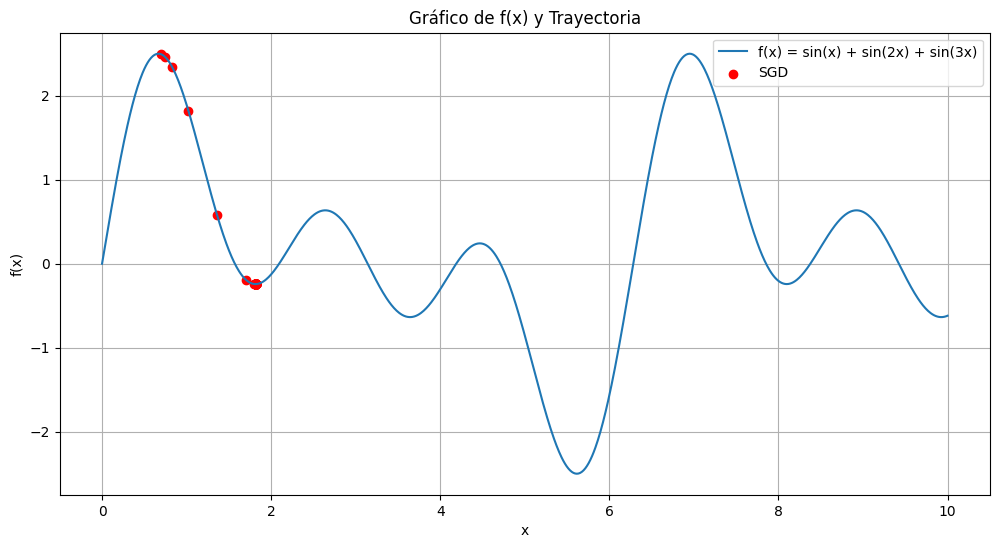

In [3]:
# Inicializamos la variable x en el valor máximo
x = initial_max
x_history = [x]  # Lista para almacenar la trayectoria de x

# Aplicamos el Descenso de Gradiente Estocástico
for _ in range(num_iterations):
    gradient = df(x)
    x -= learning_rate * gradient
    x_history.append(x)

plot_history(f, x_history, 'SGD')

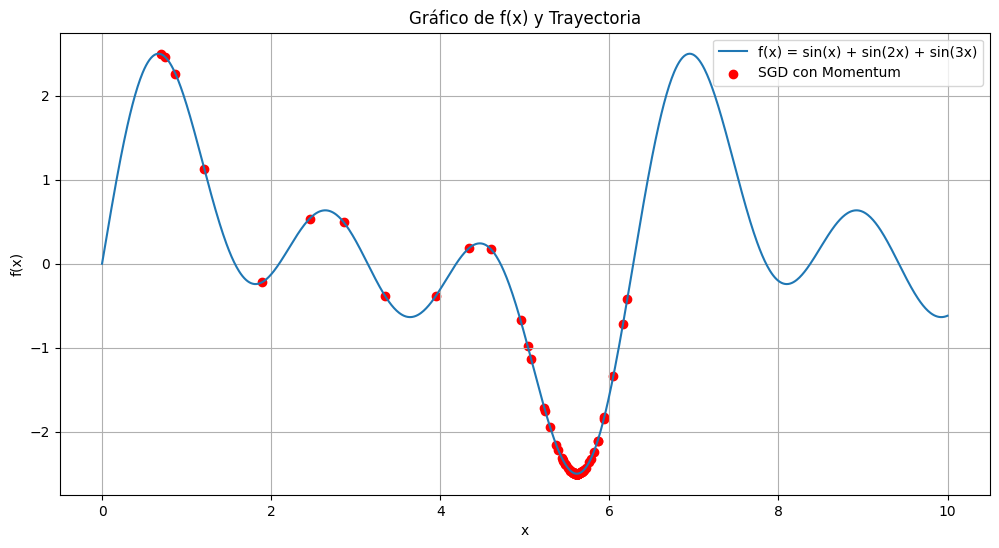

In [4]:
# Parámetros del SGD con momentum
momentum = 0.9        # Factor de momentum

# Inicializamos la variable x en el valor máximo
x = initial_max
x_history = [x]  # Lista para almacenar la trayectoria de x
velocity = 0     # Inicializamos la velocidad en cero

# Aplicamos el Descenso de Gradiente Estocástico con momentum
for _ in range(num_iterations):
    gradient = df(x)
    velocity = momentum * velocity - learning_rate * gradient
    x += velocity
    x_history.append(x)

plot_history(f, x_history, 'SGD con Momentum')

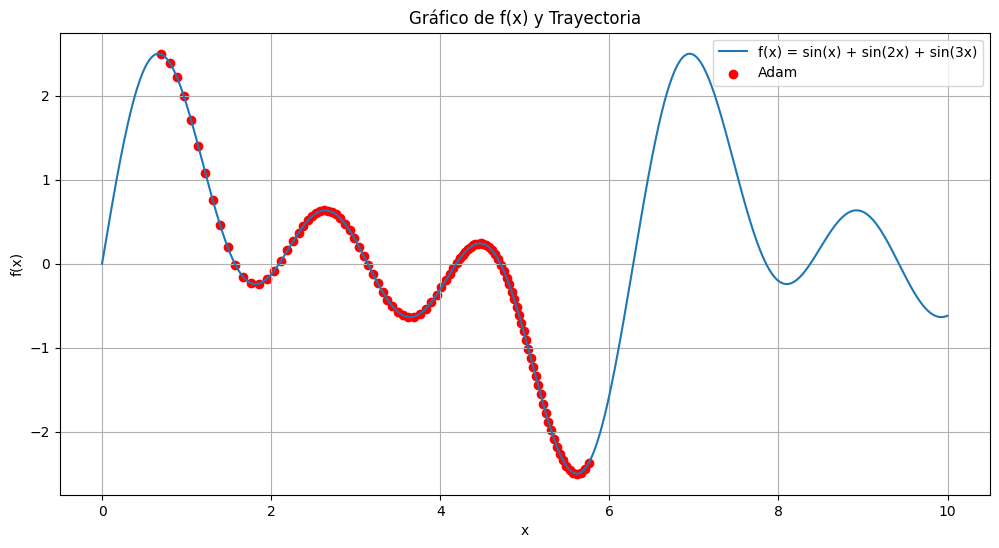

In [5]:
# Parámetros de Adam
beta1 = 0.999           # Factor de decaimiento del primer momento
beta2 = 0.9         # Factor de decaimiento del segundo momento
epsilon = 1e-8        # Pequeña constante para evitar división por cero

# Inicializamos la variable x en el valor máximo
x = initial_max
x_history = [x]  # Lista para almacenar la trayectoria de x
m = 0            # Primer momento inicial
v = 0            # Segundo momento inicial
t = 0            # Contador de iteraciones inicial

# Aplicamos el algoritmo Adam
for _ in range(num_iterations):
    t += 1
    gradient = df(x)
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * (gradient**2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    x_history.append(x)

plot_history(f, x_history, 'Adam')